In [ ]:
import pandas as pd
import numpy as np
import random
import string
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.chained_assignment = None

In [ ]:
pip install sktime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Noise

In [ ]:
class NoiseTrader:

    def __init__(self):
        #super().init(unique_id, model)
        self.cash_balance = max(round(np.abs(np.random.normal(50000, 100000))), 30000)
        self.asset_balance = round(np.random.uniform(0, 1000))
        #self.i = 0
        self.action = "None"
        self.order_type = "None"

    def connection(self, model):
        self.NT = model

    def offset_from_power_law_distribution(self):
        alpha = 3.0  # Показатель степенной зависимости.
        xmin = 0.01  # Минимальное значение переменной.
        xmax = 1.0  # Максимальное значение переменной.
        rand = np.random.uniform(0, 1)  # Случайное значение.
        offset = ((rand * (xmax**(alpha + 1) - xmin**(alpha + 1)) + xmin**(alpha + 1))**(1 / (alpha + 1))) * xmax
        return offset

    def trade(self):
        r = np.random.uniform(0, 1)
        r2 = np.random.uniform(0, 1)
        r3 = np.random.uniform(0, 1)
        #p = OrderBook()
        order = np.array([])
        self.order_id = self.NT.generate_id()
        self.price = self.NT.generate_price()
        if r >= 0.5 and self.cash_balance >= self.price:
            self.action = "ask"
            if 0 < r3 and r3 < 0.35:   # limit price
                self.order_type = "limit"
                if r2 < 0.35:
                    self.action = "None"
                    self.price = np.random.uniform(self.NT.get_best_ask(), self.NT.get_best_bid())
                    self.maxstocks = self.cash_balance//self.price
                    if self.maxstocks != 0:
                        self.action = "ask"
                        self.quantity = min(round(np.random.lognormal(2, 2)), self.maxstocks)
                        self.order_id = "NT-" + self.order_id + "-" + str(round(float(self.price),2)) + "-" + str(self.quantity)
                        order = np.append(order, [round(float(self.price),2), self.quantity, self.order_id, self.order_type, self.action])
                        self.NT.add_order(order)
                else:
                    self.action = "None"
                    offset = self.offset_from_power_law_distribution()
                    self.price = self.NT.get_best_ask() + offset
                    self.maxstocks = self.cash_balance//self.price
                    if self.maxstocks != 0:
                        self.action = "ask"
                        self.quantity = min(round(np.random.lognormal(2, 2)), self.maxstocks)
                        self.order_id = "NT-" + self.order_id + "-" + str(round(float(self.price),2)) + "-" + str(self.quantity)
                        order = np.append(order, [round(float(self.price),2), self.quantity, self.order_id, self.order_type, self.action])
                        self.NT.add_order(order)
            elif 0.35 < r3 and r3 < 0.5:   # market price
                self.order_type = "market"
                if (self.NT.market_bid_info() != True):
                    self.action = "None"
                    self.price = self.NT.get_best_bid()  # np.random.uniform(self.NT.get_best_ask(), self.NT.get_best_bid()
                    self.maxstocks = self.cash_balance//self.price
                    if self.maxstocks != 0:
                        self.action = "ask"
                        self.quantity = min(round(np.random.lognormal(2, 2)), self.maxstocks)
                        self.order_id = "NT-" + self.order_id + "-" + str(round(float(self.price),2)) + "-" + str(self.quantity)
                        order = np.append(order, [round(float(self.price),2), self.quantity, self.order_id, self.order_type, self.action])
                        self.NT.add_order(order)
                        self.NT.market_match(self.action, self.order_id)
            else:
                self.action = "None"

        elif r < 0.5 and self.asset_balance > 0:
            self.action = "bid"
            if 0 < r3 and r3 < 0.35:   # limit price
                self.order_type = "limit"
                if r2 < 0.35:
                    self.price = np.random.uniform(self.NT.get_best_ask(), self.NT.get_best_bid())
                    #self.maxstocks = self.cash_balance//self.price
                    self.quantity = max(min(round(np.random.lognormal(2, 2)), self.asset_balance), 1)
                    self.order_id = "NT-" + self.order_id + "-" + str(round(float(self.price),2)) + "-" + str(self.quantity)
                    order = np.append(order, [round(float(self.price),2), self.quantity, self.order_id, self.order_type, self.action])
                    self.NT.add_order(order)
                else:
                    offset = self.offset_from_power_law_distribution()
                    self.price = self.NT.get_best_bid() - offset
                    #self.maxstocks = self.cash_balance//self.price
                    self.quantity = max(min(round(np.random.lognormal(2, 2)), self.asset_balance), 1)
                    self.order_id = "NT-" + self.order_id + "-" + str(round(float(self.price),2)) + "-" + str(self.quantity)
                    order = np.append(order, [round(float(self.price),2), self.quantity, self.order_id, self.order_type, self.action])
                    self.NT.add_order(order)
            elif 0.35 < r3 and r3 < 0.5:   # market price
                self.order_type = "market"
                if (self.NT.market_ask_info() != True):
                    self.price = self.NT.get_best_ask()  # np.random.uniform(self.NT.get_best_ask(), self.NT.get_best_bid())
                    #self.maxstocks = self.cash_balance//self.price
                    self.quantity = max(min(round(np.random.lognormal(2, 2)), self.asset_balance), 1)
                    self.order_id = "NT-" + self.order_id + "-" + str(round(float(self.price),2)) + "-" + str(self.quantity)
                    order = np.append(order, [round(float(self.price),2), self.quantity, self.order_id, self.order_type, self.action])
                    self.NT.add_order(order)
                    self.NT.market_match(self.action, self.order_id)
            else:
                self.action = "None"

    def update_balance(self):
        if self.action != "None":
            trades = self.NT.get_info_trade(self.order_id, self.action)
            trades = trades.apply(pd.to_numeric)
            if self.action == "ask":
                for i in range(len(trades)):
                    self.asset_balance += trades["quantity"].iloc[i]
                    self.cash_balance = round(self.cash_balance - (trades["price"].iloc[i] * trades["quantity"].iloc[i]),2)
                    self.action = "None"
                    self.order_type = "None"
            else:
                for i in range(len(trades)):
                    self.asset_balance -= trades["quantity"].iloc[i]
                    self.cash_balance = round(self.cash_balance + (trades["price"].iloc[i] * trades["quantity"].iloc[i]),2)
                    self.action = "None"
                    self.order_type = "None"

# Big Spontaneous Trader

In [ ]:
class BigSpontaneousTrader:

    def __init__(self):
        #super().init(unique_id, model)
        self.cash_balance = max(round(np.abs(np.random.normal(1000000, 500000))), 400000)
        self.asset_balance = round(np.random.uniform(10000, 30000))
        #self.i = 0
        self.action = "None"
        self.order_type = "None"

    def connection(self, model):
        self.BST = model

    def offset_from_power_law_distribution(self):
        alpha = 3.0  # Показатель степенной зависимости.
        xmin = 0.01  # Минимальное значение переменной.
        xmax = 1.0  # Максимальное значение переменной.
        rand = np.random.uniform(0, 1)  # Случайное значение.
        offset = ((rand * (xmax**(alpha + 1) - xmin**(alpha + 1)) + xmin**(alpha + 1))**(1 / (alpha + 1))) * xmax
        return offset

    def trade(self):
        r = np.random.uniform(0, 1)
        r2 = np.random.uniform(0, 1)
        r3 = np.random.uniform(0, 1)
        #p = OrderBook()
        order = np.array([])
        self.order_id = self.BST.generate_id()
        self.price = self.BST.generate_price()
        if r >= 0.5 and self.cash_balance >= self.price:
            self.action = "ask"
            if 0 < r3 and r3 < 0.35:   # limit price
                self.order_type = "limit"
                if r2 < 0.35:
                    self.action = "None"
                    self.price = np.random.uniform(self.BST.get_best_ask(), self.BST.get_best_bid())
                    self.maxstocks = self.cash_balance//self.price
                    if self.maxstocks != 0:
                        self.action = "ask"
                        self.quantity = min(round(np.random.lognormal(2, 2)), self.maxstocks)
                        self.order_id = "BST-" + self.order_id + "-" + str(round(float(self.price),2)) + "-" + str(self.quantity)
                        order = np.append(order, [round(float(self.price),2), self.quantity, self.order_id, self.order_type, self.action])
                        self.BST.add_order(order)
                else:
                    self.action = "None"
                    offset = self.offset_from_power_law_distribution()
                    self.price = self.BST.get_best_ask() + offset
                    self.maxstocks = self.cash_balance//self.price
                    if self.maxstocks != 0:
                        self.action = "ask"
                        self.quantity = min(round(np.random.lognormal(2, 2)), self.maxstocks)
                        self.order_id = "BST-" + self.order_id + "-" + str(round(float(self.price),2)) + "-" + str(self.quantity)
                        order = np.append(order, [round(float(self.price),2), self.quantity, self.order_id, self.order_type, self.action])
                        self.BST.add_order(order)
            elif 0.35 < r3 and r3 < 0.5:   # market price
                self.order_type = "market"
                if (self.BST.market_bid_info() != True):
                    self.action = "None"
                    self.price = self.BST.get_best_bid()  # np.random.uniform(self.NT.get_best_ask(), self.NT.get_best_bid()
                    self.maxstocks = self.cash_balance//self.price
                    if self.maxstocks != 0:
                        self.action = "ask"
                        self.quantity = min(round(np.random.lognormal(2, 2)), self.maxstocks)
                        self.order_id = "BST-" + self.order_id + "-" + str(round(float(self.price),2)) + "-" + str(self.quantity)
                        order = np.append(order, [round(float(self.price),2), self.quantity, self.order_id, self.order_type, self.action])
                        self.BST.add_order(order)
                        self.BST.market_match(self.action, self.order_id)
            else:
                self.action = "None"

        elif r < 0.5 and self.asset_balance > 0:
            self.action = "bid"
            if 0 < r3 and r3 < 0.35:   # limit price
                self.order_type = "limit"
                if r2 < 0.35:
                    self.price = np.random.uniform(self.BST.get_best_ask(), self.BST.get_best_bid())
                    #self.maxstocks = self.cash_balance//self.price
                    self.quantity = max(min(round(np.random.lognormal(2, 2)), self.asset_balance), 1)
                    self.order_id = "BST-" + self.order_id + "-" + str(round(float(self.price),2)) + "-" + str(self.quantity)
                    order = np.append(order, [round(float(self.price),2), self.quantity, self.order_id, self.order_type, self.action])
                    self.BST.add_order(order)
                else:
                    offset = self.offset_from_power_law_distribution()
                    self.price = self.BST.get_best_bid() - offset
                    #self.maxstocks = self.cash_balance//self.price
                    self.quantity = max(min(round(np.random.lognormal(2, 2)), self.asset_balance), 1)
                    self.order_id = "BST-" + self.order_id + "-" + str(round(float(self.price),2)) + "-" + str(self.quantity)
                    order = np.append(order, [round(float(self.price),2), self.quantity, self.order_id, self.order_type, self.action])
                    self.BST.add_order(order)
            elif 0.35 < r3 and r3 < 0.5:   # market price
                self.order_type = "market"
                if (self.BST.market_ask_info() != True):
                    self.price = self.BST.get_best_ask()  # np.random.uniform(self.NT.get_best_ask(), self.NT.get_best_bid())
                    #self.maxstocks = self.cash_balance//self.price
                    self.quantity = max(min(round(np.random.lognormal(2, 2)), self.asset_balance), 1)
                    self.order_id = "BST-" + self.order_id + "-" + str(round(float(self.price),2)) + "-" + str(self.quantity)
                    order = np.append(order, [round(float(self.price),2), self.quantity, self.order_id, self.order_type, self.action])
                    self.BST.add_order(order)
                    self.BST.market_match(self.action, self.order_id)
            else:
                self.action = "None"

    def update_balance(self):
        if self.action != "None":
            trades = self.BST.get_info_trade(self.order_id, self.action)
            trades = trades.apply(pd.to_numeric)
            if self.action == "ask":
                for i in range(len(trades)):
                    self.asset_balance += trades["quantity"].iloc[i]
                    self.cash_balance = round(self.cash_balance - (trades["price"].iloc[i] * trades["quantity"].iloc[i]),2)
                    self.action = "None"
                    self.order_type = "None"
            else:
                for i in range(len(trades)):
                    self.asset_balance -= trades["quantity"].iloc[i]
                    self.cash_balance = round(self.cash_balance + (trades["price"].iloc[i] * trades["quantity"].iloc[i]),2)
                    self.action = "None"
                    self.order_type = "None"

# MM


In [ ]:
class HFTMarketMakingAgent:
    def __init__(self):
        self.cash_balance = max(round(np.abs(np.random.normal(100000, 100000))), 50000)
        self.inventory = 0
        self.action = "None"
        self.order_type = "None"
        self.history = np.array([self.inventory])

    def connection(self, model):
        self.MM = model

    def inventory(self):
        return self.history

    def trade(self):
        self.softlimit = np.where(np.random.uniform(0, 1) > 0.5, 100, -100)
        bid_price = self.get_bid_price()
        ask_price = self.get_ask_price()
        price = np.random.uniform(ask_price, bid_price)
        self.UL = self.cash_balance // price
        self.LL = -100
        totasksize = max(0, 100 - 1 - self.inventory)
        totbidsize = max(0, self.inventory - self.LL - 1)
        bid_order_size = self.get_order_size(totbidsize, bid=True)
        ask_order_size = self.get_order_size(totasksize, bid=False)
        order = np.array([])
        order_id = self.MM.generate_id()
        if self.inventory <= 0:
            self.action = "ask"
            self.order_id = "MM-" + order_id + "-" + str(round(float(price),2)) + "-" + str(ask_order_size)
            order = np.append(order, [round(float(price),2), ask_order_size, self.order_id, "limit", "ask"])
            self.MM.add_order(order)
        else:
            self.action = "bid"
            self.order_id = "MM-" + order_id + "-" + str(round(float(price),2)) + "-" + str(bid_order_size)
            order = np.append(order, [round(float(price),2), bid_order_size, self.order_id, "limit", "bid"])
            self.MM.add_order(order)

    def get_bid_price(self):
        best_bid = self.MM.get_best_bid()
        best_ask = self.MM.get_best_ask()
        baseoffset = -(((best_ask - best_bid) - 1) * (self.inventory / (self.softlimit)))
        bid_price = best_bid + baseoffset
        # Check that bid price is within price banding constraints   self.NT.get_best_ask(), self.NT.get_best_bid()
        last_traded_price = self.MM.last_traded_price()
        k = 5
        if (((last_traded_price - k) > best_bid) & (best_bid < (last_traded_price + k))) & (((last_traded_price - k) > best_ask) & (best_ask < (last_traded_price + k))):
            return bid_price
        else:
            if abs(bid_price - (last_traded_price - k)) < abs(bid_price - (last_traded_price + k)):
                bid_price = (last_traded_price - k) + baseoffset if bid_price < (last_traded_price - k) + baseoffset else bid_price
                return bid_price
            else:
                bid_price = (last_traded_price + k) + baseoffset if bid_price > (last_traded_price + k) + baseoffset else bid_price
                return bid_price

    def get_ask_price(self):
        best_bid = self.MM.get_best_bid()
        best_ask = self.MM.get_best_ask()
        baseoffset = -(((best_ask - best_bid) - 1) * (self.inventory / (self.softlimit)))
        ask_price = best_ask + baseoffset
        # Check that offer price is within price banding constraints
        last_traded_price = self.MM.last_traded_price()
        k = 5
        if (((last_traded_price - k) > best_bid) & (best_bid < (last_traded_price + k))) & (((last_traded_price - k) > best_ask) & (best_ask < (last_traded_price + k))):
            return ask_price
        else:
            if abs(ask_price - (last_traded_price - k)) < abs(ask_price - (last_traded_price + k)):
                ask_price = (last_traded_price - k) + baseoffset if ask_price < (last_traded_price - k) + baseoffset else ask_price
                return ask_price
            else:
                ask_price = (last_traded_price + k) + baseoffset if ask_price > (last_traded_price + k) + baseoffset else ask_price
                return ask_price

    def get_order_size(self, limit_size, bid=True):
        if bid:
            order_size = limit_size if self.inventory - limit_size > self.LL and limit_size < 199 else int(np.random.uniform(1, self.inventory))
        else:
            order_size = limit_size if limit_size < 199 and limit_size <= self.UL else int(np.random.uniform(1, 199))
        return order_size

    def update_balance(self):
        if self.action != "None":
            trades = self.MM.get_info_trade(self.order_id, self.action)
            trades = trades.apply(pd.to_numeric)
            if self.action == "ask":
                for i in range(len(trades)):
                    self.inventory += trades["quantity"].iloc[i]
                    self.cash_balance = round(self.cash_balance - (trades["price"].iloc[i] * trades["quantity"].iloc[i]),2)
                    self.action = "None"
                    self.order_type = "None"
            else:
                for i in range(len(trades)):
                    self.inventory -= trades["quantity"].iloc[i]
                    self.cash_balance = round(self.cash_balance + (trades["price"].iloc[i] * trades["quantity"].iloc[i]),2)
                    self.action = "None"
                    self.order_type = "None"

            self.history = np.append(self.history, self.inventory)

## MA


In [ ]:
class MovingAverageTrader:
    def __init__(self):
        self.cash_balance = max(round(np.abs(np.random.normal(50000, 100000))), 40000)
        self.asset_balance = round(np.random.uniform(0, 1000))
        self.action = "None"
        self.order_type = "None"

    def connection(self, model):
        self.MA = model

    def trade(self):
        r = np.random.uniform(0, 1)
        r2 = np.random.uniform(0, 1)
        if len(self.MA.ma_history) == 30:
            #self.ma10 = np.mean(self.MA.ma10_history)
            #self.ma30 = np.mean(self.MA.ma30_history)
            self.price = self.MA.generate_price()
            self.order_id = self.MA.generate_id()
            order = np.array([])
            stock_df = pd.DataFrame(self.MA.ma_history)
            stock_df.rename(columns = {0 : 'Close'}, inplace = True)
            if r2 > 0.4:
                moving_avg = 'SMA'
            else:
                moving_avg = 'EMA'
            short_window_col = str(10) + '_' + moving_avg
            long_window_col = str(30) + '_' + moving_avg
            if moving_avg == 'SMA':
                stock_df[short_window_col] = stock_df['Close'].rolling(window = 10, min_periods = 1).mean()
                stock_df[long_window_col] = stock_df['Close'].rolling(window = 30, min_periods = 1).mean()
            elif moving_avg == 'EMA':
                stock_df[short_window_col] = stock_df['Close'].ewm(span = 10, adjust = False).mean()
                stock_df[long_window_col] = stock_df['Close'].ewm(span = 30, adjust = False).mean()
            stock_df['Signal'] = 0
            stock_df['Signal'] = np.where(stock_df[short_window_col] > stock_df[long_window_col], 1, 0)
            stock_df['Position'] = stock_df['Signal'].diff()
            signal = stock_df['Position'].iloc[-1]

            if r > 0.5:
                self.order_type = "limit"
                if signal == -1 and self.asset_balance > 0:
                    self.action = "bid"
                    self.price = np.random.uniform(self.MA.get_best_ask(), self.MA.get_best_bid())
                    self.quantity = max(min(round(np.random.lognormal(2, 2)), self.asset_balance), 1)
                    self.order_id = "MA-" + self.order_id + "-" + str(round(float(self.price),2)) + "-" + str(self.quantity)
                    order = np.append(order, [round(float(self.price),2), self.quantity, self.order_id, self.order_type, self.action])
                    self.MA.add_order(order)
                elif signal == 1 and self.cash_balance >= self.price:
                    self.price = np.random.uniform(self.MA.get_best_ask(), self.MA.get_best_bid())
                    self.maxstocks = self.cash_balance//self.price
                    if self.maxstocks != 0:
                        self.action = "ask"
                        self.quantity = min(round(np.random.lognormal(2, 2)), self.maxstocks)
                        self.order_id = "MA-" + self.order_id + "-" + str(round(float(self.price),2)) + "-" + str(self.quantity)
                        order = np.append(order, [round(float(self.price),2), self.quantity, self.order_id, self.order_type, self.action])
                        self.MA.add_order(order)

                else:
                    self.action = "None"
            else:
                  self.order_type = "market"
                  if (self.MA.market_ask_info() != True) and signal == -1 and self.asset_balance > 0:
                      self.action = "bid"
                      self.price = self.MA.get_best_ask()  # np.random.uniform(self.NT.get_best_ask(), self.NT.get_best_bid())
                      #self.maxstocks = self.cash_balance//self.price
                      self.quantity = max(min(round(np.random.lognormal(2, 2)), self.asset_balance), 1)
                      self.order_id = "MA-" + self.order_id + "-" + str(round(float(self.price),2)) + "-" + str(self.quantity)
                      order = np.append(order, [round(float(self.price),2), self.quantity, self.order_id, self.order_type, self.action])
                      self.MA.add_order(order)
                      self.MA.market_match(self.action, self.order_id)
                  elif (self.MA.market_ask_info() != True) and signal == 1 and self.cash_balance >= self.price:
                      self.price = self.MA.get_best_bid()  # np.random.uniform(self.NT.get_best_ask(), self.NT.get_best_bid()
                      self.maxstocks = self.cash_balance//self.price
                      if self.maxstocks != 0:
                          self.action = "ask"
                          self.quantity = min(round(np.random.lognormal(2, 2)), self.maxstocks)
                          self.order_id = "MA-" + self.order_id + "-" + str(round(float(self.price),2)) + "-" + str(self.quantity)
                          order = np.append(order, [round(float(self.price),2), self.quantity, self.order_id, self.order_type, self.action])
                          self.MA.add_order(order)
                          self.MA.market_match(self.action, self.order_id)
                  else:
                      self.action = "None"

    def update_balance(self):
        if self.action != "None":
            trades = self.MA.get_info_trade(self.order_id, self.action)
            trades = trades.apply(pd.to_numeric)
            if self.action == "ask":
                for i in range(len(trades)):
                    self.asset_balance += trades["quantity"].iloc[i]
                    self.cash_balance = round(self.cash_balance - (trades["price"].iloc[i] * trades["quantity"].iloc[i]),2)
                    self.action = "None"
                    self.order_type = "None"
            else:
                for i in range(len(trades)):
                    self.asset_balance -= trades["quantity"].iloc[i]
                    self.cash_balance = round(self.cash_balance + (trades["price"].iloc[i] * trades["quantity"].iloc[i]),2)
                    self.action = "None"
                    self.order_type = "None"


## RSI

In [ ]:
class RSITrader:
    def __init__(self):
        self.cash_balance = max(round(np.abs(np.random.normal(50000, 100000))), 40000)
        self.asset_balance = round(np.random.uniform(0, 1000))
        self.action = "None"
        self.order_type = "None"

    def connection(self, model):
        self.RSI = model

    def trade(self):
        r = np.random.uniform(0, 1)
        if len(self.RSI.rsi_history) == 14:
            self.rsi = self.RSI.rsi()
            self.price = self.RSI.generate_price()
            self.order_id = self.RSI.generate_id()
            order = np.array([])
            if r > 0.5:
                self.order_type = "limit"
                if self.rsi > 70 and self.asset_balance > 0:
                    self.action = "bid"
                    self.price = np.random.uniform(self.RSI.get_best_ask(), self.RSI.get_best_bid())
                    self.quantity = max(min(round(np.random.lognormal(2, 2)), self.asset_balance), 1)
                    self.order_id = "RSI-" + self.order_id + "-" + str(round(float(self.price),2)) + "-" + str(self.quantity)
                    order = np.append(order, [round(float(self.price),2), self.quantity, self.order_id, self.order_type, self.action])
                    self.RSI.add_order(order)
                elif self.rsi < 30 and self.cash_balance >= self.price:
                    self.price = np.random.uniform(self.RSI.get_best_ask(), self.RSI.get_best_bid())
                    self.maxstocks = self.cash_balance//self.price
                    if self.maxstocks != 0:
                        self.action = "ask"
                        self.quantity = min(round(np.random.lognormal(2, 2)), self.maxstocks)
                        self.order_id = "RSI-" + self.order_id + "-" + str(round(float(self.price),2)) + "-" + str(self.quantity)
                        order = np.append(order, [round(float(self.price),2), self.quantity, self.order_id, self.order_type, self.action])
                        self.RSI.add_order(order)
            else:
                  self.order_type = "market"
                  if (self.RSI.market_ask_info() != True) and self.rsi > 70 and self.asset_balance > 0:
                      self.action = "bid"
                      self.price = self.RSI.get_best_ask()  # np.random.uniform(self.NT.get_best_ask(), self.NT.get_best_bid())
                      #self.maxstocks = self.cash_balance//self.price
                      self.quantity = max(min(round(np.random.lognormal(2, 2)), self.asset_balance), 1)
                      self.order_id = "RSI-" + self.order_id + "-" + str(round(float(self.price),2)) + "-" + str(self.quantity)
                      order = np.append(order, [round(float(self.price),2), self.quantity, self.order_id, self.order_type, self.action])
                      self.RSI.add_order(order)
                      self.RSI.market_match(self.action, self.order_id)
                  elif (self.RSI.market_ask_info() != True) and self.rsi < 30 and self.cash_balance >= self.price:
                      self.price = self.RSI.get_best_bid()  # np.random.uniform(self.NT.get_best_ask(), self.NT.get_best_bid()
                      self.maxstocks = self.cash_balance//self.price
                      if self.maxstocks != 0:
                          self.action = "ask"
                          self.quantity = min(round(np.random.lognormal(2, 2)), self.maxstocks)
                          self.order_id = "RSI-" + self.order_id + "-" + str(round(float(self.price),2)) + "-" + str(self.quantity)
                          order = np.append(order, [round(float(self.price),2), self.quantity, self.order_id, self.order_type, self.action])
                          self.RSI.add_order(order)
                          self.RSI.market_match(self.action, self.order_id)
                  else:
                      self.action = "None"

    def update_balance(self):
        if self.action != "None":
            trades = self.RSI.get_info_trade(self.order_id, self.action)
            trades = trades.apply(pd.to_numeric)
            if self.action == "ask":
                for i in range(len(trades)):
                    self.asset_balance += trades["quantity"].iloc[i]
                    self.cash_balance = round(self.cash_balance - (trades["price"].iloc[i] * trades["quantity"].iloc[i]),2)
                    self.action = "None"
                    self.order_type = "None"
            else:
                for i in range(len(trades)):
                    self.asset_balance -= trades["quantity"].iloc[i]
                    self.cash_balance = round(self.cash_balance + (trades["price"].iloc[i] * trades["quantity"].iloc[i]),2)
                    self.action = "None"
                    self.order_type = "None"


# ORDER BOOK

In [ ]:
class OrderBook:

    def __init__(self, initial_price, ask, bid):
        self.ask = pd.DataFrame(columns=['price', 'quantity', 'order_id'])
        self.bid = pd.DataFrame(columns=['price', 'quantity', 'order_id'])
        self.buy_market = pd.DataFrame(columns=['price', 'quantity', 'order_id'])
        self.sell_market = pd.DataFrame(columns=['price', 'quantity', 'order_id'])
        self.matches_market = pd.DataFrame(columns=['price', 'quantity', 'order_id_ask', 'order_id_bid'])
        self.matches = pd.DataFrame(columns=['price', 'quantity', 'order_id_ask', 'order_id_bid'])

        self.price = np.array([initial_price])
        self.best_ask = ask
        self.best_bid = bid
        self.spread = self.best_bid - self.best_ask

        self.ma_periods = 30
        self.ma_history = []

        self.rsi_periods = 14
        self.rsi_history = []

    def generate_id(self, length = 6):
        letters_and_digits = string.ascii_letters + string.digits
        rand_string = ''.join(random.sample(letters_and_digits, length))
        return rand_string

    def print_ask(self):
        return self.ask       #  "MM-72HWsS-price-quantity"  /{0-6}*

    def print_bid(self):
        return self.bid

    def print_matches(self):
        return self.matches

    def add_order(self, order):
        if order[3] == "market":
            if order[4] == "ask":
                temp = order[:-2].copy()
                self.buy_market.loc[len(self.buy_market)] = temp
                self.buy_market = self.buy_market.astype({"price": float, "quantity": float})
            else:
                temp = order[:-2].copy()
                self.sell_market.loc[len(self.sell_market)] = temp
                self.sell_market = self.sell_market.astype({"price": float, "quantity": float})
        else:
            if order[4] == "ask":
                temp = order[:-2].copy()
                self.ask.loc[len(self.ask)] = temp
                self.ask = self.ask.astype({"price": float, "quantity": float})
            else:
                temp = order[:-2].copy()
                self.bid.loc[len(self.bid)] = temp
                self.bid = self.bid.astype({"price": float, "quantity": float})

    def delete_orders(self):
        self.ask = self.ask[self.ask.index < 0]
        self.bid = self.bid[self.bid.index < 0]

    def market_match(self, action, order_id):
        self.ask = self.ask.sort_values(by = "price",ascending = False).reset_index(drop=True)
        self.bid = self.bid.sort_values(by = "price").reset_index(drop=True)
        if action == "ask":
            bids = np.array([1111111111111])
            target = (self.buy_market.loc[self.buy_market['order_id'] == order_id]).iloc[0]
            for i in range(len(self.bid)):
                if target["price"] == self.bid["price"].iloc[i]:
                    matching = np.array([])
                    quantity = np.abs(target["quantity"] - self.bid["quantity"].iloc[i])
                    if quantity == 0:
                        matching = np.append(matching, [self.bid["price"].iloc[i], target["quantity"], target["order_id"], self.bid["order_id"].iloc[i]])
                        self.matches_market.loc[len(self.matches_market)] = matching
                        target["quantity"] = 0
                        self.bid["quantity"].iloc[i] = 0
                        self.price = np.round(np.append(self.price, self.bid["price"].iloc[i]),2)
                        bids = np.append(bids, i)
                    else:
                        temp = min(target["quantity"], self.bid["quantity"].iloc[i])
                        if target["quantity"] > self.bid["quantity"].iloc[i]:
                            target["quantity"] -= temp
                            self.bid["quantity"].iloc[i] = 0
                        else:
                            self.bid["quantity"].iloc[i] -= temp
                            target["quantity"] = 0
                        matching = np.append(matching, [self.bid["price"].iloc[i], temp, target["order_id"], self.bid["order_id"].iloc[i]])
                        self.matches_market.loc[len(self.matches_market)] = matching
                        self.price = np.round(np.append(self.price, self.bid["price"].iloc[i]),2)
                        if self.bid["quantity"].iloc[i] == 0:
                            bids = np.append(bids, i)

            bids = np.delete(bids, 0)
            self.bid = self.bid.drop(index = bids)
            self.buy_market = pd.DataFrame(columns=['price', 'quantity', 'order_id'])
        else:
            target = (self.sell_market.loc[self.sell_market['order_id'] == order_id]).iloc[0]
            asks = np.array([1111111111111])
            for i in range(len(self.ask)):
                if target["price"] == self.ask["price"].iloc[i]:
                    matching = np.array([])
                    quantity = np.abs(target["quantity"] - self.ask["quantity"].iloc[i])
                    if quantity == 0:
                        matching = np.append(matching, [self.ask["price"].iloc[i], target["quantity"], self.ask["order_id"].iloc[i], target["order_id"]])
                        self.matches_market.loc[len(self.matches_market)] = matching
                        target["quantity"] = 0
                        self.ask["quantity"].iloc[i] = 0
                        asks = np.append(asks, i)
                    else:
                        temp = min(target["quantity"], self.ask["quantity"].iloc[i])
                        if target["quantity"] > self.ask["quantity"].iloc[i]:
                            target["quantity"] -= temp
                            self.ask["quantity"].iloc[i] = 0
                        else:
                            self.ask["quantity"].iloc[i] -= temp
                            target["quantity"] = 0
                        matching = np.append(matching, [self.ask["price"].iloc[i], temp, self.ask["order_id"].iloc[i], target["order_id"]])
                        self.matches_market.loc[len(self.matches_market)] = matching
                        if self.ask["quantity"].iloc[i] == 0:
                            asks = np.append(asks, i)

            asks = np.delete(asks, 0)
            self.ask = self.ask.drop(index = asks)
            self.sell_market = pd.DataFrame(columns=['price', 'quantity', 'order_id'])

    def matching(self):
        self.ask = self.ask.sort_values(by = "price").reset_index(drop=True)
        self.bid = self.bid.sort_values(by = "price").reset_index(drop=True)
        asks = np.array([1111111111111])
        bids = np.array([1111111111111])

        for i in range(len(self.ask)):
            for j in range(len(self.bid)):
                if i not in asks and j not in bids:
                    if self.ask["price"].iloc[i] == self.bid["price"].iloc[j]:
                        matching = np.array([])
                        quantity = np.abs(self.ask["quantity"].iloc[i] - self.bid["quantity"].iloc[j])
                        if quantity == 0:
                            matching = np.append(matching, [self.ask["price"].iloc[i], self.ask["quantity"].iloc[i], self.ask["order_id"].iloc[i], self.bid["order_id"].iloc[j]])
                            self.matches.loc[len(self.matches)] = matching
                            self.price = np.round(np.append(self.price, self.ask["price"].iloc[i]),2)
                            self.ask["quantity"].iloc[i] = 0
                            self.bid["quantity"].iloc[j] = 0
                            asks = np.append(asks, i)
                            bids = np.append(bids, j)
                            #self.ask = self.ask[self.ask.index != i]
                            #self.bid = self.bid[self.bid.index != j]
                        else:
                            self.price = np.round(np.append(self.price, self.ask["price"].iloc[i]),2)
                            temp = min(self.ask["quantity"].iloc[i], self.bid["quantity"].iloc[j])
                            if self.ask["quantity"].iloc[i]> self.bid["quantity"].iloc[j]:

                                self.ask["quantity"].iloc[i] -= temp
                                self.bid["quantity"].iloc[j] = 0
                            else:
                                self.bid["quantity"].iloc[j] -= temp
                                self.ask["quantity"].iloc[i] = 0

                            matching = np.append(matching, [self.ask["price"].iloc[i], temp, self.ask["order_id"].iloc[i], self.bid["order_id"].iloc[j]])
                            self.matches.loc[len(self.matches)] = matching

                            if self.ask["quantity"].iloc[i] == 0:
                                asks = np.append(asks, i)
                            else:
                                bids = np.append(bids, j)

        for i in range(len(self.ask)):
            for j in range(len(self.bid)):
                if i not in asks and j not in bids:
                    if self.ask["price"].iloc[i] != self.bid["price"].iloc[j]:
                        matching = np.array([])
                        quantity = np.abs(self.ask["quantity"].iloc[i] - self.bid["quantity"].iloc[j])
                        if quantity == 0:
                            self.price = np.round(np.append(self.price, (self.ask["price"].iloc[i] + self.bid["price"].iloc[j])/2),2)
                            matching = np.append(matching, [(self.ask["price"].iloc[i] + self.bid["price"].iloc[j])/2, self.ask["quantity"].iloc[i], \
                                                                                          self.ask["order_id"].iloc[i], self.bid["order_id"].iloc[j]])
                            self.matches.loc[len(self.matches)] = matching
                            self.ask["quantity"].iloc[i] = 0
                            self.bid["quantity"].iloc[j] = 0
                            asks = np.append(asks, i)
                            bids = np.append(bids, j)
                        else:
                            self.price = np.round(np.append(self.price, (self.ask["price"].iloc[i] + self.bid["price"].iloc[j])/2),2)
                            temp = min(self.ask["quantity"].iloc[i], self.bid["quantity"].iloc[j])
                            if self.ask["quantity"].iloc[i] > self.bid["quantity"].iloc[j]:
                                self.ask["quantity"].iloc[i] -= temp
                                self.bid["quantity"].iloc[j] = 0
                            else:
                                self.bid["quantity"].iloc[j] -= temp
                                self.ask["quantity"].iloc[i] = 0

                            matching = np.append(matching, [(self.ask["price"].iloc[i] + self.bid["price"].iloc[j])/2, \
                                                      temp, self.ask["order_id"].iloc[i], self.bid["order_id"].iloc[j]])
                            self.matches.loc[len(self.matches)] = matching

                            if self.ask["quantity"].iloc[i] == 0:
                                asks = np.append(asks, i)
                            else:
                                bids = np.append(bids, j)

        asks = np.delete(asks, 0)
        bids = np.delete(bids, 0)

        self.ask = self.ask.drop(index = asks)
        self.bid = self.bid.drop(index = bids)

        if len(self.price) > 1:
            self.price = np.delete(self.price, 0)

    def get_info_trade(self, order_id, action):
        dataframe = pd.concat([self.matches, self.matches_market])
        dataframe = dataframe.loc[dataframe['order_id_' + action] == order_id]
        dataframe.drop(["order_id_ask", "order_id_bid"], axis=1,inplace=True)
        return dataframe

    def update_ma(self):
        self.ma_history.append(self.new_price)
        if len(self.ma_history) > self.ma_periods:
            del self.ma_history[0]

    def update_rsi(self):
        self.rsi_history.append(self.new_price)
        if len(self.rsi_history) > self.rsi_periods:
            del self.rsi_history[0]

    def rsi(self):
        diff = np.diff(self.rsi_history)
        up, down = diff.copy(), diff.copy()
        up[up < 0] = 0
        down[down > 0] = 0
        gain = round(np.average(up, axis=0), 2)
        loss = round(np.average(down, axis=0), 2)
        rs = abs(gain / loss)
        return 100 - (100 / (1 + rs))

    def generate_price(self):
        self.new_price = float(sum(self.price)/len(self.price))
        return self.new_price

    def last_traded_price(self):
        return self.price[-1]

    def delete_info(self):
        self.price = np.array([self.new_price])
        self.ask = pd.DataFrame(columns=['price', 'quantity', 'order_id'])
        self.bid = pd.DataFrame(columns=['price', 'quantity', 'order_id'])
        self.matches = pd.DataFrame(columns=['price', 'quantity', 'order_id_ask', 'order_id_bid'])
        self.matches_market = pd.DataFrame(columns=['price', 'quantity', 'order_id_ask', 'order_id_bid'])

    def get_best_ask(self):
        dataframe = self.matches.copy()
        dataframe.drop(["order_id_ask", "order_id_bid"], axis=1,inplace=True)
        best_ask = self.best_ask
        if (self.ask.empty == False):
            if len(self.price) == 1:
                self.best_ask = self.ask["price"].min()
            else:
                self.best_ask = np.where(best_ask < self.best_ask, best_ask, self.best_ask)
            return self.best_ask
        elif ((self.ask.empty == True) and (dataframe.empty == False)):
            #self.best_ask = dataframe["price"].min()
            return self.best_ask
        elif ((self.ask.empty == True) and (dataframe.empty == True)):
            return self.best_ask

    def get_best_bid(self):
        dataframe = self.matches.copy()
        dataframe.drop(["order_id_ask", "order_id_bid"], axis=1,inplace=True)
        best_bid = self.best_bid
        if (self.bid.empty == False):
            if len(self.price) == 1:
                self.best_bid = self.bid["price"].max()
            else:
                self.best_bid = np.where(best_bid > self.best_bid, best_bid, self.best_bid)
            return self.best_bid
        elif ((self.bid.empty == True) and (dataframe.empty == False)):
            #self.best_bid = dataframe["price"].max()
            return self.best_bid
        elif ((self.bid.empty == True) and (dataframe.empty == True)):
            return self.best_bid

    def get_spread(self):
        return self.spread

    def market_ask_info(self):
        return self.ask.empty

    def market_bid_info(self):
        return self.bid.empty


# Market


In [ ]:
class Market:

    def __init__(self, noise_num, mm_num, ma_num, rsi_num, bst_num, epochs, price, ask, bid):
        self.noise_num = noise_num
        self.mm_num = mm_num
        self.ma_num = ma_num
        self.rsi_num = rsi_num
        self.bst_num = bst_num
        self.epochs = epochs
        self.agents = np.array([])
        self.book = OrderBook(price, ask, bid)
        self.prices = np.array([], dtype = np.float128)
        self.MMagents = np.array([])

    def create_agents(self):
        for i in range(self.noise_num):
            noise = NoiseTrader()
            noise.connection(self.book)
            self.agents = np.append(self.agents, noise)

        for i in range(self.mm_num):
            mm = HFTMarketMakingAgent()
            mm.connection(self.book)
            self.MMagents = np.append(self.MMagents, mm)
            self.agents = np.append(self.agents, mm)

        for i in range(self.ma_num):
            ma = MovingAverageTrader()
            ma.connection(self.book)
            self.agents = np.append(self.agents, ma)

        for i in range(self.rsi_num):
            rsi = RSITrader()
            rsi.connection(self.book)
            self.agents = np.append(self.agents, rsi)

        for i in range(self.bst_num):
            bst = BigSpontaneousTrader()
            bst.connection(self.book)
            self.agents = np.append(self.agents, bst)

        return random.shuffle(self.agents)

    def plot_inventory(self, periods):
        plt.figure(figsize=(15,8))
        i = 1
        for agent in self.MMagents:
            idx = pd.date_range('2023-04-02', periods = periods, freq='D')
            plt.plot(idx, agent.history, label = "MM" + str(i))
            i += 1
        plt.legend()
        plt.show

    def simulate(self):
        for i in range(self.epochs):
            for agent in self.agents:
                agent.trade()

            self.book.matching()
            self.prices = np.append(self.prices, self.book.generate_price())
            self.book.update_ma()
            self.book.update_rsi()

            for agent in self.agents:
                agent.update_balance()
            self.book.delete_info()

        return self.prices

    def is_flash_crash(self):
        count = 0
        for i in range(len(self.prices)-2):
            if self.prices[i] > self.prices[i+1] and self.prices[i+1] <= 0.9 * self.prices[i] and \
                      self.prices[i+1] < self.prices[i+2] and self.prices[i+2] >= 1.1 * self.prices[i+1]:
                count += 1
        print("Number of Flash Crashes: ", count)

# TEST

In [ ]:
#for i in range(100):
#    simulation = Market(120, 15, 10, 10, 3, 300, 100, 99.59, 100.31)
 #   simulation.create_agents()
 #   prices = simulation.simulate()

In [ ]:
simulation = Market(120, 15, 10, 10, 3, 300, 100, 99.59, 100.31)

In [ ]:
simulation.create_agents()

In [ ]:
prices = simulation.simulate()

In [ ]:
simulation.is_flash_crash()

Number of Flash Crashes:  1


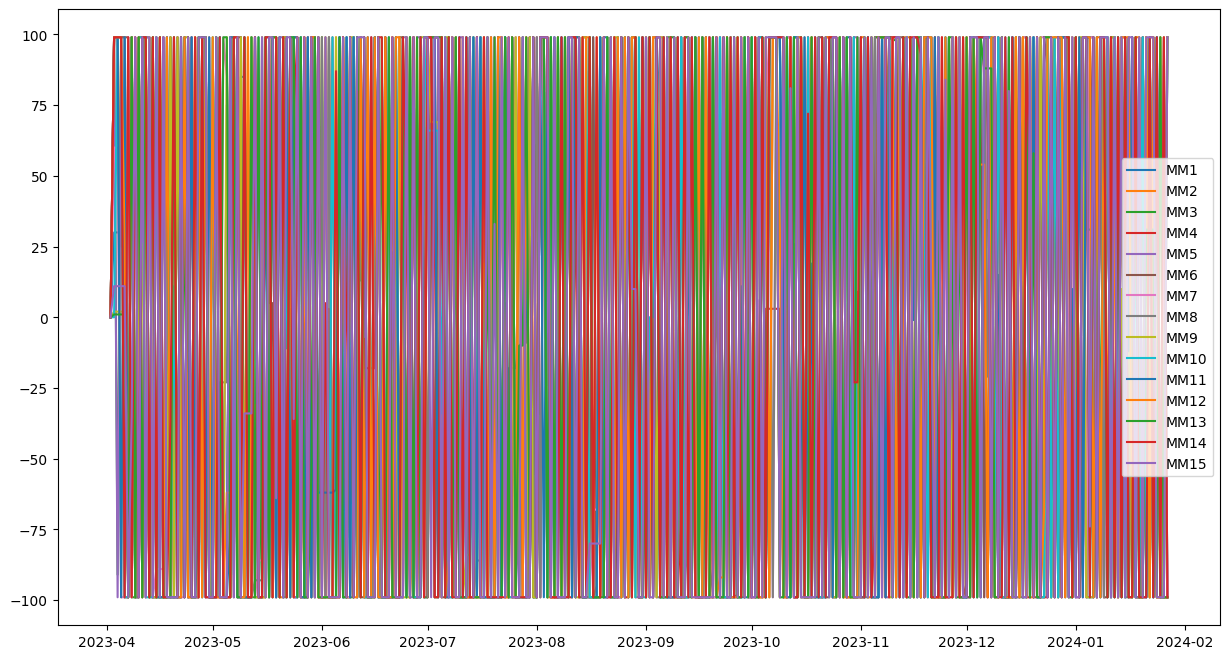

In [ ]:
simulation.plot_inventory(301)

In [ ]:
prices

array([ 99.41082192,  99.58571429,  99.8       ,  99.93653846,
       101.23327869, 101.3025    , 101.59722222, 102.10387755,
       101.73222222, 101.77829268, 101.16891304, 102.59673077,
       102.10170213, 100.29843137,  95.76255814,  95.87756757,
        93.58892857,  93.93189655,  90.84105263,  83.4625641 ,
        85.43361111,  85.90393443,  85.21492063,  85.328     ,
        84.80527273,  84.39341463,  83.46555556,  84.25811321,
        82.778     ,  82.97324324,  82.75590909,  81.70596491,
        80.981     ,  81.14766667,  80.9475    ,  79.22928571,
        79.405     ,  78.31758621,  78.91627907,  77.58962963,
        78.57444444,  76.9697561 ,  74.20086957,  75.41597015,
        75.80578947,  73.84842105,  75.2726087 ,  76.97405797,
        75.33913793,  74.56413043,  75.46186441,  79.23659574,
        67.63826087,  71.37255319,  71.53294118,  61.9593617 ,
        68.14611111,  67.03830189,  80.45490196,  70.68151515,
        69.336     ,  77.55088235,  76.09595238,  74.52

In [ ]:
idx = pd.date_range('2023-04-02', periods = 300, freq='D')

In [ ]:
prices_series = pd.Series(prices, index = idx.to_period())

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

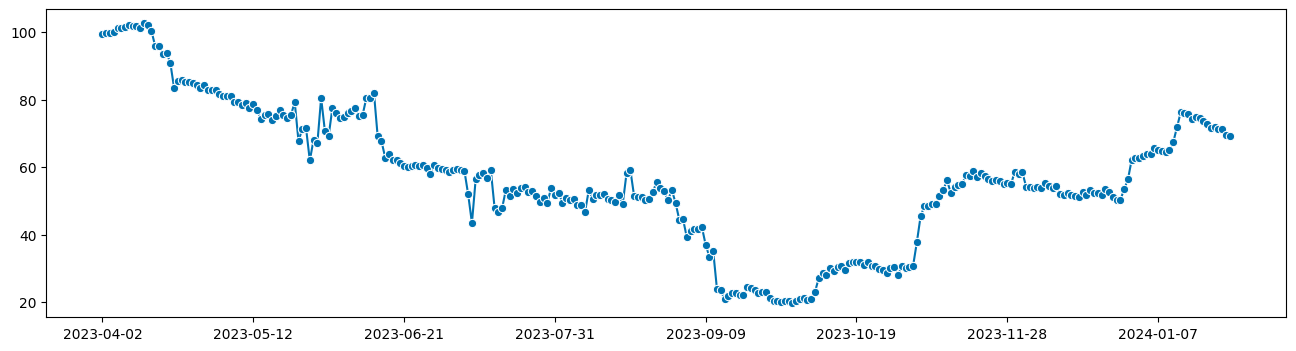

In [ ]:
from sktime.utils.plotting import plot_series
plot_series(prices_series)

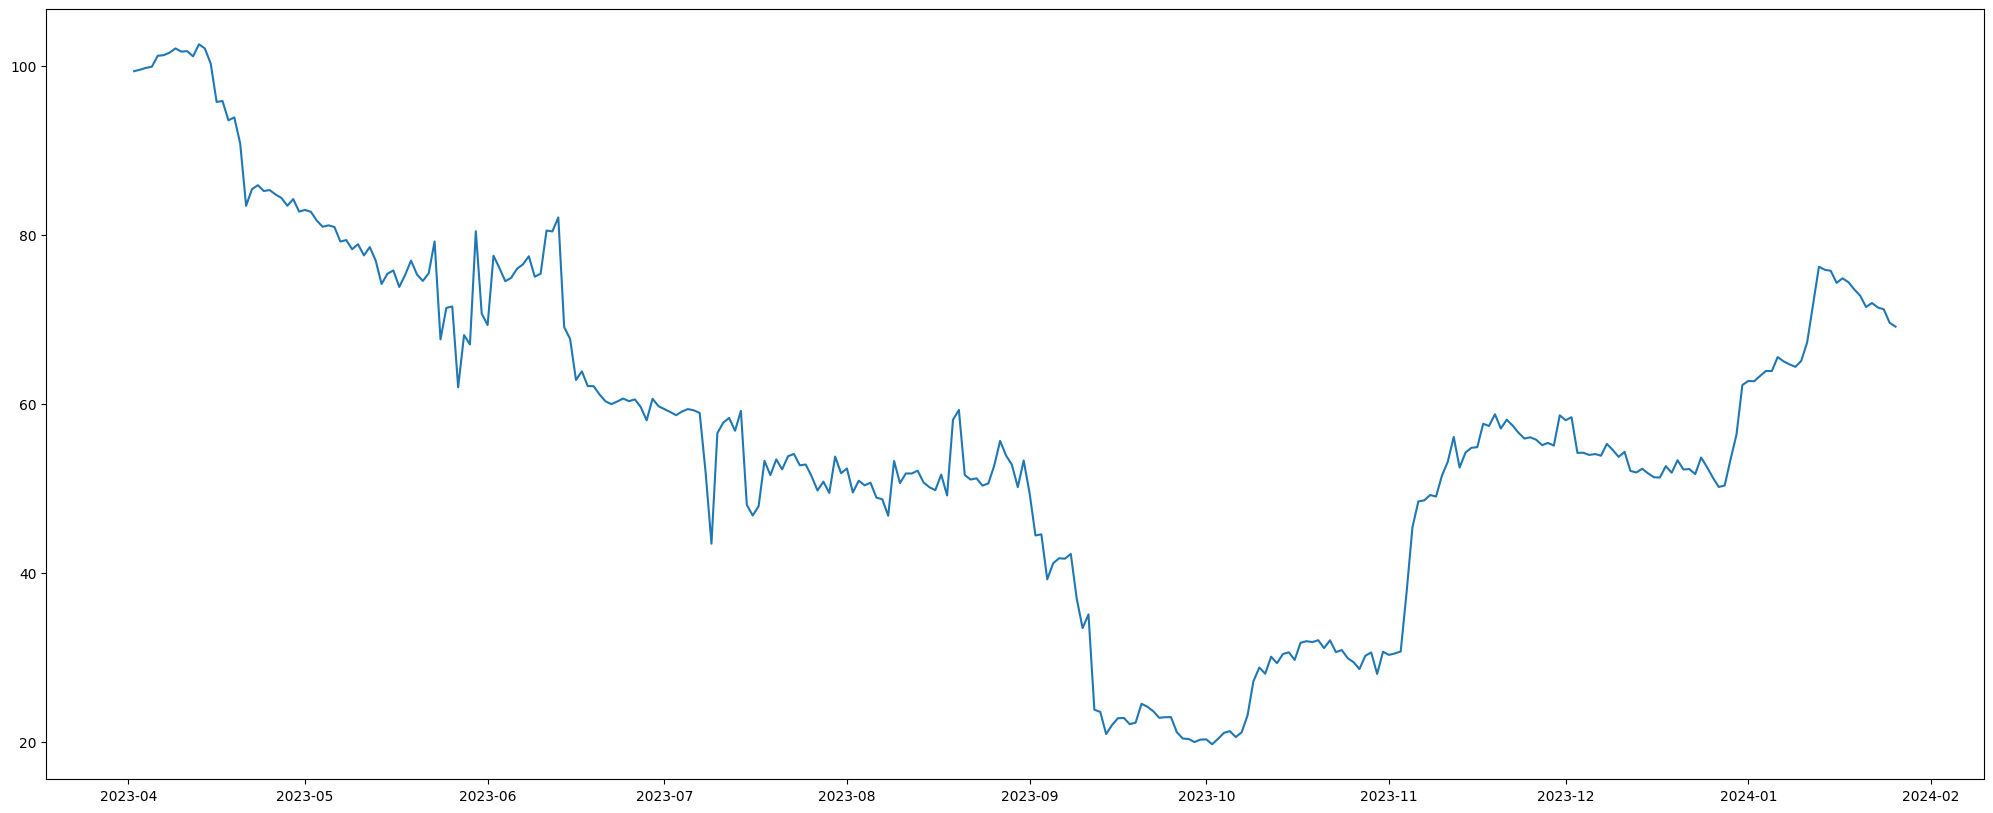

In [ ]:
plt.figure(figsize=(25,10))
plt.plot(idx, prices_series.values)

Flash crash